In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
boston = load_boston()
bos = pd.DataFrame(boston.data)

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

In [2]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
target = list(boston['target'])

In [4]:
bos.columns=boston['feature_names']

In [5]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
bos['Price'] = target

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

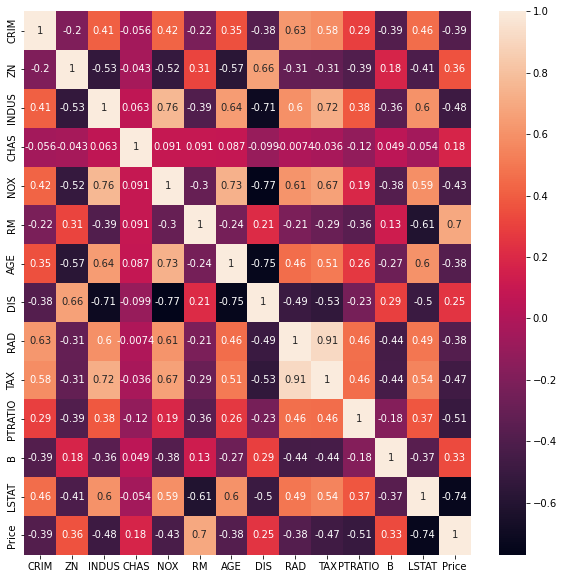

In [8]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(bos.corr(),annot=True)

In [9]:
X = bos.drop('Price',axis=1)
y = bos['Price']

In [10]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [11]:
fea_sel = SelectFromModel(Lasso(alpha=0.01))
s1 = fea_sel.fit(X,y)
l = list(X.columns[(s1.get_support())])

In [12]:
l

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [13]:
X = X[l]

In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
scale = StandardScaler()
d = scale.fit_transform(X)
X = pd.DataFrame(d,columns=['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT'])

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
reg = LinearRegression()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
r2_score(y_test,pred)

0.6709339839115633

In [23]:
import pickle

In [2]:
pickle.dump(scale,open('preprocessing.pkl','wb'))

NameError: name 'scale' is not defined

In [3]:
pickle.dump(reg,open('model.pkl','wb'))

NameError: name 'reg' is not defined

In [4]:
pre = pickle.load(open('preprocessing.pkl','rb'))

In [5]:
model = pickle.load(open('model.pkl','rb'))

In [27]:
data = {
    'CRM':0.00632,
 'ZN':18.0,
 'INDUS':2.31,
 'CHAS':0.0,
 'NOX':0.538,
 'RM':6.575,
 'AGE':65.2,
 'DIS':4.0900,
 'RAD':1.0,
 'TAX':296.0,
 'PTRATIO':15.3,
 'B':396.90,
 'LSTAT':4.98
}

#0.00632	18.0	2.31	0.0	0.538	6.575	65.2	4.0900	1.0	296.0	15.3	396.90	4.98

In [28]:
s = np.array(list(data.values()))
import numpy as np

In [29]:
e = s.reshape(1,-1)

In [15]:
d = pre.transform(e)

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
model.predict(d)[0]

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


30.145518980897023

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
res = RandomForestRegressor()

In [20]:
res.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
pred = res.predict(X_test)

In [22]:
r2_score(y_test,pred)

0.8598864646642705

In [25]:
pickle.dump(scale,open('process.pkl','wb'))
pickle.dump(res,open('bos_res.pkl','wb'))

In [26]:
pro = pickle.load(open('process.pkl','rb'))
mo = pickle.load(open('bos_res.pkl','rb'))

In [30]:
d = pro.transform(e)

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
mo.predict(d)[0]

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


25.034999999999986